In [1]:
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, LSTM, Dense
from keras.layers.wrappers import TimeDistributed

Using TensorFlow backend.


In [2]:
from keras.datasets import imdb

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [4]:
from keras.utils import to_categorical, np_utils
import numpy as np

In [5]:
train_reviews = 5000
valid_reviews = 100
max_features = 5000
embedding_size = 256
step_size = 5
batch_size = 32
index_from = 2
rnn_units = 128
epochs = 2
word_index_prev = {'<PAD>': 0, '<START>': 1, '<UNK>': 2}

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features, index_from=index_from)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [8]:
word_index = {word: (index+index_from) for word, index in imdb.get_word_index().items() if (index+index_from) < max_features}

In [9]:
index_word = {index: word for word, index in word_index.items()}

In [10]:
def print_sentence(sentence):
    for index in sentence:
        print(index_word[index], end=" ")
    print()

In [12]:
print(word_index)

{'woods': 1410, 'hanging': 2347, 'woody': 2291, 'bringing': 2340, 'wooden': 1638, 'errors': 4012, 'dialogs': 3232, 'kids': 361, 'want': 180, 'travel': 2105, 'dinosaurs': 3932, 'wrong': 354, 'subplots': 4762, 'fit': 1182, 'screaming': 1929, 'fix': 4289, 'effects': 301, 'disturbed': 4013, 'purpose': 1287, 'needed': 886, 'master': 1299, 'feeling': 546, 'cinematic': 1359, 'tech': 4990, 'saying': 659, 'altogether': 3901, 'nicely': 1779, 'mummy': 4590, 'lots': 774, 'nature': 875, 'superficial': 3902, 'extent': 2825, 'much': 75, 'doubts': 4991, 'spin': 3086, 'hong': 2578, 'corporate': 4451, 'hal': 4313, 'ham': 4894, 'had': 68, 'has': 46, 'hat': 2403, 'crowd': 2292, 'bottom': 1323, 'starring': 1183, 'shoots': 3233, 'raped': 3539, 'explosions': 3977, 'chain': 3628, 'whoever': 2499, 'chair': 3038, 'ballet': 4519, 'jerk': 3398, 'locked': 2896, 'exact': 2590, 'minute': 785, 'unintentionally': 3385, 'cusack': 3842, 'opposed': 3629, 'following': 1044, 'convincingly': 4520, 'surfing': 4254, 'jim': 12

In [13]:
print(index_word)

{1410: 'woods', 2347: 'hanging', 2291: 'woody', 2340: 'bringing', 1638: 'wooden', 4012: 'errors', 3232: 'dialogs', 361: 'kids', 180: 'want', 2105: 'travel', 3932: 'dinosaurs', 354: 'wrong', 4762: 'subplots', 1182: 'fit', 1929: 'screaming', 4289: 'fix', 301: 'effects', 4013: 'disturbed', 1287: 'purpose', 886: 'needed', 1299: 'master', 546: 'feeling', 1359: 'cinematic', 4990: 'tech', 659: 'saying', 3901: 'altogether', 1779: 'nicely', 4590: 'mummy', 774: 'lots', 875: 'nature', 3902: 'superficial', 2825: 'extent', 75: 'much', 4991: 'doubts', 3086: 'spin', 2578: 'hong', 4451: 'corporate', 4313: 'hal', 4894: 'ham', 68: 'had', 46: 'has', 2403: 'hat', 2292: 'crowd', 1323: 'bottom', 1183: 'starring', 3233: 'shoots', 3539: 'raped', 3977: 'explosions', 3628: 'chain', 2499: 'whoever', 3038: 'chair', 4519: 'ballet', 3398: 'jerk', 2896: 'locked', 2590: 'exact', 785: 'minute', 3385: 'unintentionally', 3842: 'cusack', 3629: 'opposed', 1044: 'following', 4520: 'convincingly', 4254: 'surfing', 1239: 'ji

In [14]:
print(x_train[0])

[1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 2, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 2, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 2, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 2, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 2, 18, 177, 31]


In [15]:
index_word[1]

KeyError: 1

In [16]:
word_index.update(word_index_prev)

In [18]:
index_word = {index: word for word, index in word_index.items()}

In [19]:
index_word[1]

'<START>'

In [20]:
print_sentence(x_train[0])

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly <UNK> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they

In [22]:
[t for s in x_train[:train_reviews] for t in s]

[1,
 13,
 21,
 15,
 42,
 529,
 972,
 1621,
 1384,
 64,
 457,
 4467,
 65,
 3940,
 3,
 172,
 35,
 255,
 4,
 24,
 99,
 42,
 837,
 111,
 49,
 669,
 2,
 8,
 34,
 479,
 283,
 4,
 149,
 3,
 171,
 111,
 166,
 2,
 335,
 384,
 38,
 3,
 171,
 4535,
 1110,
 16,
 545,
 37,
 12,
 446,
 3,
 191,
 49,
 15,
 5,
 146,
 2024,
 18,
 13,
 21,
 3,
 1919,
 4612,
 468,
 3,
 21,
 70,
 86,
 11,
 15,
 42,
 529,
 37,
 75,
 14,
 12,
 1246,
 3,
 21,
 16,
 514,
 16,
 11,
 15,
 625,
 17,
 2,
 4,
 61,
 385,
 11,
 7,
 315,
 7,
 105,
 4,
 3,
 2222,
 2,
 15,
 479,
 65,
 3784,
 32,
 3,
 129,
 11,
 15,
 37,
 618,
 4,
 24,
 123,
 50,
 35,
 134,
 47,
 24,
 1414,
 32,
 5,
 21,
 11,
 214,
 27,
 76,
 51,
 4,
 13,
 406,
 15,
 81,
 2,
 7,
 3,
 106,
 116,
 2,
 14,
 255,
 3,
 2,
 6,
 3765,
 4,
 722,
 35,
 70,
 42,
 529,
 475,
 25,
 399,
 316,
 45,
 6,
 3,
 2,
 1028,
 12,
 103,
 87,
 3,
 380,
 14,
 296,
 97,
 31,
 2070,
 55,
 25,
 140,
 5,
 193,
 2,
 17,
 3,
 225,
 21,
 20,
 133,
 475,
 25,
 479,
 4,
 143,
 29,
 2,
 17,
 50,
 35,
 2

In [23]:
data_train = [t for s in x_train[:train_reviews] for t in s]

In [24]:
data_valid = [t for s in x_train[train_reviews: train_reviews+valid_reviews] for t in s]

In [25]:
def batch_generator(data, batch_size, step_size):
    seg_len = len(data) // batch_size
    steps_per_epoch = seg_len // step_size
    data_seg_list = np.asarray([data[int(i*seg_len):int((i+1)*seg_len)] for i in range(batch_size)])
    data_seg_list
    i = 0
    while True:
        x = data_seg_list[:, int(i*step_size):int((i+1)*step_size)]
        y = np.asarray([to_categorical(data_seg_list[j, int(i*step_size+1):int((i+1)*step_size+1)], max_features) for j in range(batch_size)])
        yield x, y
        i += 1
        if i >= steps_per_epoch:
            i = 0

In [28]:
w = Input(shape=(step_size,), name='Input')

In [29]:
x = Embedding(input_dim=max_features, output_dim=embedding_size, name='Embedding')(w)

In [30]:
y = LSTM(units=rnn_units, return_sequences=True, dropout=0.5, recurrent_dropout=0.5, name='LSTM')(x)

In [31]:
w_next = TimeDistributed(Dense(units=max_features, activation='softmax', name='Dense'), name='TimeDistributed')(y)

In [32]:
model = Model(inputs=[w], outputs=[w_next])

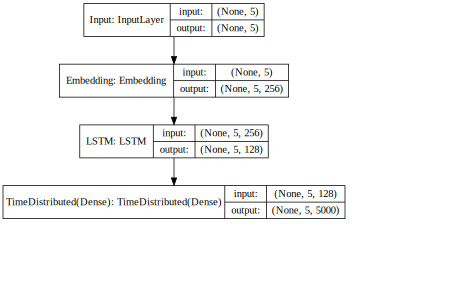

In [33]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [34]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 5)                 0         
_________________________________________________________________
Embedding (Embedding)        (None, 5, 256)            1280000   
_________________________________________________________________
LSTM (LSTM)                  (None, 5, 128)            197120    
_________________________________________________________________
TimeDistributed (TimeDistrib (None, 5, 5000)           645000    
Total params: 2,122,120
Trainable params: 2,122,120
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
gen_train = batch_generator(data_train, batch_size, step_size)

In [37]:
gen_valid = batch_generator(data_valid, batch_size, step_size)

In [38]:
steps_per_epoch_train = len(data_train) / batch_size / step_size

In [39]:
steps_per_epoch_valid = len(data_valid) / batch_size / step_size

In [42]:
model.fit_generator(generator=gen_train, steps_per_epoch=steps_per_epoch_train, epochs=epochs, validation_data=gen_valid, validation_steps=steps_per_epoch_valid)

/usr/local/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/2
7620/7619 [==============================] - 332s 44ms/step - loss: 5.6273 - accuracy: 0.1456 - val_loss: 5.3347 - val_accuracy: 0.1580
Epoch 2/2
7620/7619 [==============================] - 335s 44ms/step - loss: 5.4428 - accuracy: 0.1668 - val_loss: 5.7153 - val_accuracy: 0.1664


In [43]:
def sample(preds, temperature=1.0):
    preds = np.log(preds) / temperature
    preds = np.exp(preds) / np.sum(np.exp(preds))
    choices = range(len(preds))
    return np.random.choice(choices, p=preds)

In [44]:
def sample_sentences(num_sentences, sample_sent_len=20):
    for x_test_i in x_test[:num_sentences]:
        x = np.zeros((1, step_size))
        sentence = x_test_i[:step_size]
        for i in range(sample_sent_len):
            for j, index in enumerate(sentence[-step_size:]):
                x[0, j] = index
            preds = model.predict(x)[0][-1]
            next_index = sample(preds)
            sentence.append(next_index)
        print_sentence(sentence)

In [45]:
sample_sentences(num_sentences=20, sample_sent_len=20)

<START> please give this one makes it <UNK> <UNK> basically watched br br find many both these teacher surviving and <UNK> he was interested out 
<START> this film requires a exactly in the angry the <UNK> of <UNK> <UNK> here thinking for it and <UNK> and smith were make our 
<START> many animation buffs consider a about <UNK> that jeffrey <UNK> ever took when things should see but i appears a time story was over 
<START> i generally love this guy appears at the outside the now star <UNK> has a close to make since she presents it is having 
<START> like some other people later <UNK> on probably there and for a <UNK> of a <UNK> you've seen each you should believe this eye 
<START> i'm absolutely <UNK> this one <UNK> up before an stay on her course like two of the <UNK> <UNK> save a <UNK> than in 
<START> originally supposed to be a way and the story jane off annoying and the event girl its me best days me about i just 
<START> the <UNK> richard <UNK> awful <UNK> fans of the war only alw

In [46]:
norm_weights = np_utils.normalize(model.get_weights()[0])

In [47]:
print(norm_weights)

[[ 0.05351349 -0.02650234 -0.02461333 ... -0.05772989  0.061176
   0.05955046]
 [-0.01142352 -0.04870127  0.04896487 ... -0.01605032  0.04063414
  -0.05256715]
 [-0.07646313  0.06624959 -0.04249781 ... -0.00070121 -0.03840887
   0.05383044]
 ...
 [ 0.02043611 -0.03846219  0.06070501 ...  0.03931997 -0.13030224
   0.02277836]
 [ 0.00936983 -0.06605731 -0.14761648 ... -0.04350793 -0.01147015
  -0.08757039]
 [-0.01126156 -0.00727228  0.07365765 ...  0.01308164  0.09070814
   0.09955911]]


In [51]:
def print_closest_words(word, nb_closest=10):
    index = word_index[word]
    distance = np.dot(norm_weights, norm_weights[index])
    c_indexes = np.argsort(np.squeeze(distance))[-nb_closest:][::-1]
    for c_index in c_indexes:
        print(index_word[c_index], distance[c_index])

In [52]:
words = ["3", "two", "great", "money", "years", "look", "own", "us", "using"]

In [53]:
for word in words:
    if word in word_index:
        print("====", word)
        print_closest_words(word)

==== 3
3 1.0
8 0.71381825
7 0.69008946
5 0.6850195
4 0.6809399
1 0.6268616
2 0.6197772
9 0.61511743
ten 0.60973716
20 0.57755435
==== two
two 1.0000001
few 0.7464968
several 0.728482
three 0.72279966
many 0.7184365
these 0.6800895
some 0.6719579
four 0.63225424
other 0.6285497
five 0.59783983
==== great
great 1.0
good 0.7032096
decent 0.66255724
supporting 0.5807816
same 0.57432854
entire 0.570729
fine 0.56490874
wonderful 0.5639226
fantastic 0.54957104
excellent 0.5415483
==== money
money 0.99999994
material 0.51496583
available 0.50891054
happen 0.50413036
going 0.49980235
problem 0.49332732
went 0.49043477
work 0.4884975
cheated 0.4754681
come 0.47514504
==== years
years 1.0
year 0.7010834
right 0.52491885
came 0.5126664
sit 0.50642294
special 0.5054871
walk 0.50537705
come 0.4949631
stay 0.48856384
wonder 0.48022568
==== look
look 1.0000001
looked 0.73739946
looks 0.685808
laugh 0.6671686
looking 0.6561713
far 0.6352743
feels 0.62603486
sounds 0.60689145
interested 0.56495243
felt 